In [1]:
from IPython import get_ipython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
data = 'C:/Users/Admin/Downloads/P3/P3/UCI_datasets/pendigits_training.txt'

df = pd.read_fwf(data, names=[ "Inp1", "Inp2", "Inp3", "Inp4", "Inp5", "Inp6", "Inp7", "Inp8", "Inp9", "Inp10", "Inp11", "Inp12", "Inp13", "Inp14", "Inp15", "Inp16", "Class"])

In [3]:
df.head()

,Inp1,Inp2,Inp3,Inp4,Inp5,Inp6,Inp7,Inp8,Inp9,Inp10,Inp11,Inp12,Inp13,Inp14,Inp15,Inp16,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
df2 = df.iloc[:,:-1]
df2

,Inp1,Inp2,Inp3,Inp4,Inp5,Inp6,Inp7,Inp8,Inp9,Inp10,Inp11,Inp12,Inp13,Inp14,Inp15,Inp16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0


In [5]:
data = df2
data = ((data - data.min()) / (data.max() - data.min())) * 6 + 1

data.describe()

,Inp1,Inp2,Inp3,Inp4,Inp5,Inp6,Inp7,Inp8,Inp9,Inp10,Inp11,Inp12,Inp13,Inp14,Inp15,Inp16
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,3.243058,6.080761,3.400336,5.973371,4.052698,4.902666,4.088311,3.675981,4.427798,3.021124,4.685044,3.146926,4.281986,3.148046,3.808823,2.713923
std,1.999321,1.010905,1.575362,1.178315,2.095632,1.642640,1.840804,1.839569,2.020820,1.638125,2.227846,1.649750,1.355987,1.993417,2.491908,2.148666
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.300000,5.560000,2.200000,5.200000,2.020000,3.880000,2.680000,2.320000,2.800000,1.363636,2.500000,1.720000,3.460000,1.420000,1.000000,1.000000
50%,2.860000,6.340000,3.340000,6.340000,4.360000,5.260000,4.240000,3.520000,4.600000,2.939394,5.440000,2.920000,4.180000,2.680000,3.340000,1.480000
75%,4.660000,7.000000,4.480000,7.000000,5.860000,6.160000,5.500000,4.900000,6.280000,4.272727,6.880000,4.420000,5.140000,3.880000,7.000000,4.060000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroids(data, 4)
centroids

,0,1,2,3
Inp1,1.000000,4.660000,1.30000,7.000000
Inp2,5.800000,6.880000,4.60000,6.160000
Inp3,1.000000,6.520000,2.08000,7.000000
Inp4,4.720000,7.000000,7.00000,4.480000
Inp5,1.600000,5.020000,1.00000,7.000000
Inp6,5.680000,5.920000,5.32000,6.640000
Inp7,1.360000,6.100000,1.42000,5.560000
Inp8,3.100000,7.000000,3.82000,1.000000
Inp9,6.220000,1.480000,5.38000,3.760000
Inp10,1.909091,2.030303,1.30303,2.636364


In [7]:
def get_labels(data, centroids):
    
    #Formula for Manhattan Distance
    distances = centroids.apply(lambda x: np.sum(np.abs(data - x), axis=1))
    
    #Formula for Euclidean Distance
    #distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)

labels.value_counts()

2    3375
1    2497
0    1040
3     582
dtype: int64

In [8]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [10]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

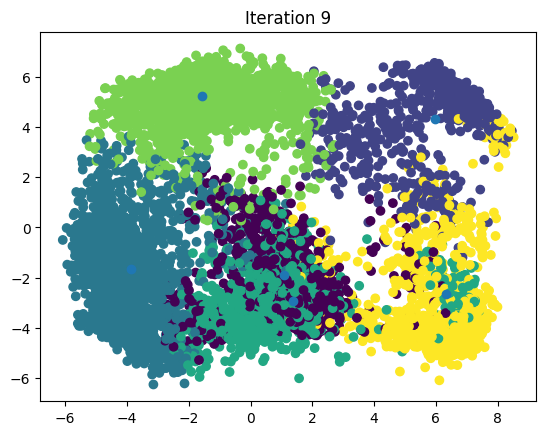

,0,1,2,3,4,5
Inp1,6.043239,3.212176,2.293070,3.363875,1.654926,2.453990
Inp2,6.863367,6.300680,5.495455,6.707277,5.808136,5.683950
Inp3,3.892988,1.952839,3.770439,2.089434,3.735608,1.755257
Inp4,6.240012,5.318387,6.138846,5.662315,6.854423,3.887532
Inp5,2.014736,3.600560,5.129275,1.179401,5.110672,2.561426
Inp6,4.587496,3.684680,6.193745,3.939709,5.783341,1.651557
Inp7,1.368815,3.887545,4.586849,2.925127,4.345346,3.676652
Inp8,2.613759,1.438670,5.551539,3.009959,3.603832,1.252996
Inp9,2.934366,1.737691,5.111455,6.015397,2.771600,4.497901
Inp10,1.285605,1.501947,4.267618,3.348766,1.637241,3.135140


In [11]:
max_iterations = 10
centroid_count = 6

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    
centroids

In [12]:
labels.value_counts()

2    2336
4    1665
3    1020
5     898
0     868
1     707
dtype: int64

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(6)
kmeans.fit(data)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [15]:
pd.DataFrame(kmeans.cluster_centers_).T

,0,1,2,3,4,5
0,3.590720,2.759534,2.018101,6.157048,2.860334,3.798057
1,6.312531,5.632709,5.861301,6.840406,5.961359,6.719454
2,2.272730,4.097376,3.921043,4.077070,1.963808,2.441048
3,5.251365,6.225481,6.858370,6.279294,4.212539,5.759782
4,4.101762,5.579722,5.304701,2.182225,2.614454,1.274454
5,3.538313,6.217152,5.845123,4.710246,1.918040,4.265873
6,4.008784,5.091473,4.479437,1.519144,4.143385,3.552817
7,1.498015,5.654071,3.738265,2.832535,1.390401,3.755873
8,1.910645,5.421567,3.158206,3.392684,5.856192,6.240895
9,1.895481,4.402136,1.851540,1.614941,3.105554,4.175863


Bar graph representation of the dataframe

<AxesSubplot: ylabel='count'>

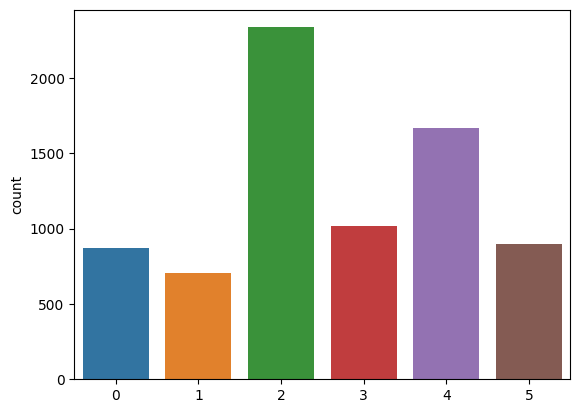

In [16]:
sns.countplot(x=labels)

Finding the Elbow curve

In [17]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [18]:
sse

[112018757.40672536,
 87407290.17036882,
 70021495.98626836,
 58142453.18848309,
 51414957.54023668,
 45665843.83213146,
 41433902.273407295,
 38924189.8685308,
 36818075.99598171]

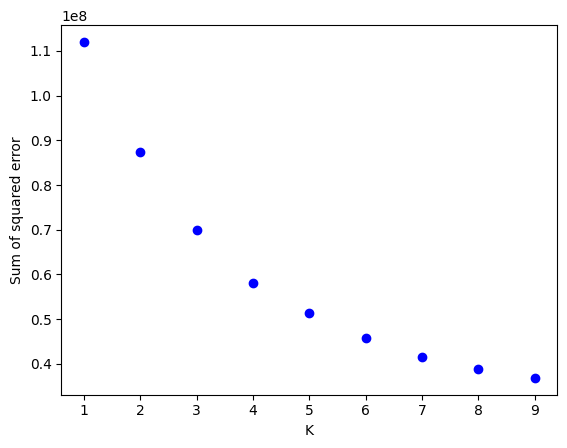

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse, 'bo')

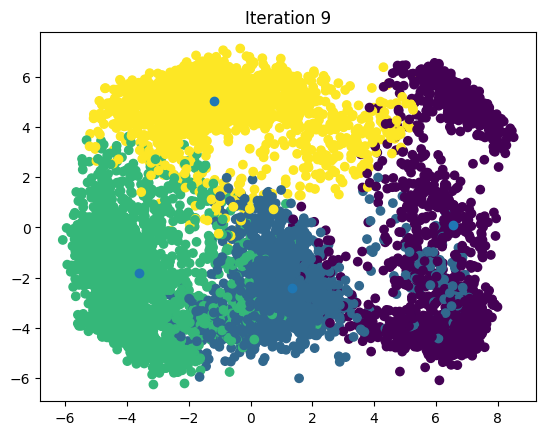

,0,1,2,3
Inp1,2.632662,4.500211,2.379282,1.843501
Inp2,6.023681,6.864508,5.522223,5.815135
Inp3,1.741293,2.910903,3.600236,3.670800
Inp4,4.316918,5.950348,6.087830,6.844695
Inp5,2.983504,1.491142,4.710221,4.703014
Inp6,2.185041,4.203518,6.070750,5.705369
Inp7,3.667419,1.876564,4.551982,4.321598
Inp8,1.212720,2.729574,5.496455,3.536964
Inp9,2.966638,4.185741,5.185245,2.809936
Inp10,2.446580,1.962292,4.340401,1.575698


In [20]:
# Re running the algorithm after finding the optimal number of clusters

max_iterations = 10
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    
centroids

Finding the accuracy through Calinski Harabasz Score

In [21]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=4)
kmeans.fit(centroids)

# predict the cluster for each data point
y_cluster_kmeans = kmeans.predict(centroids)

score = calinski_harabasz_score(centroids, y_cluster_kmeans)
print(score)

8.924696265562721


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
